<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Multiplot_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
# PARAMETERS
csv_file = '/content/sm_npq_colab_24_2.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv

In [198]:
import pandas as pd
import numpy as np

df = pd.read_csv(csv_file, delimiter=',', decimal='.') # delimiter '\t' or ';'

In [199]:
# Assuming 'df' is your DataFrame

# Get the number of 'L' columns (including 'Lss')
num_l_columns = len([col for col in df.columns if 'NPQ_L' in col])

# Rename 'L' columns (including 'Lss')
for i in range(num_l_columns):
    if i < num_l_columns - 1:
        df = df.rename(columns={f'NPQ_L{i+1}': i * 20})
    else:
        df = df.rename(columns={'NPQ_Lss': (i - 1) * 20 + 20})  # Rename 'NPQ_Lss'

df.columns = df.columns.astype(str)
print(type(df.columns))
# Get the number of 'D' columns
num_d_columns = len([col for col in df.columns if 'NPQ_D' in col])

# Calculate the starting number for 'D' columns (including 'Lss')
start_num = (num_l_columns - 1) * 20 + 20

# Rename 'D' columns
for i in range(num_d_columns):
    df = df.rename(columns={f'NPQ_D{i+1}': start_num + i * 60})

df.columns = df.columns.astype(str)

<class 'pandas.core.indexes.base.Index'>


In [200]:
#df

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 260]


<ipython-input-201-743740ae0601>:8: UserWarning: Parsing dates in %H:%M:%S  %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['month'] = pd.to_datetime(df['month']).dt.date


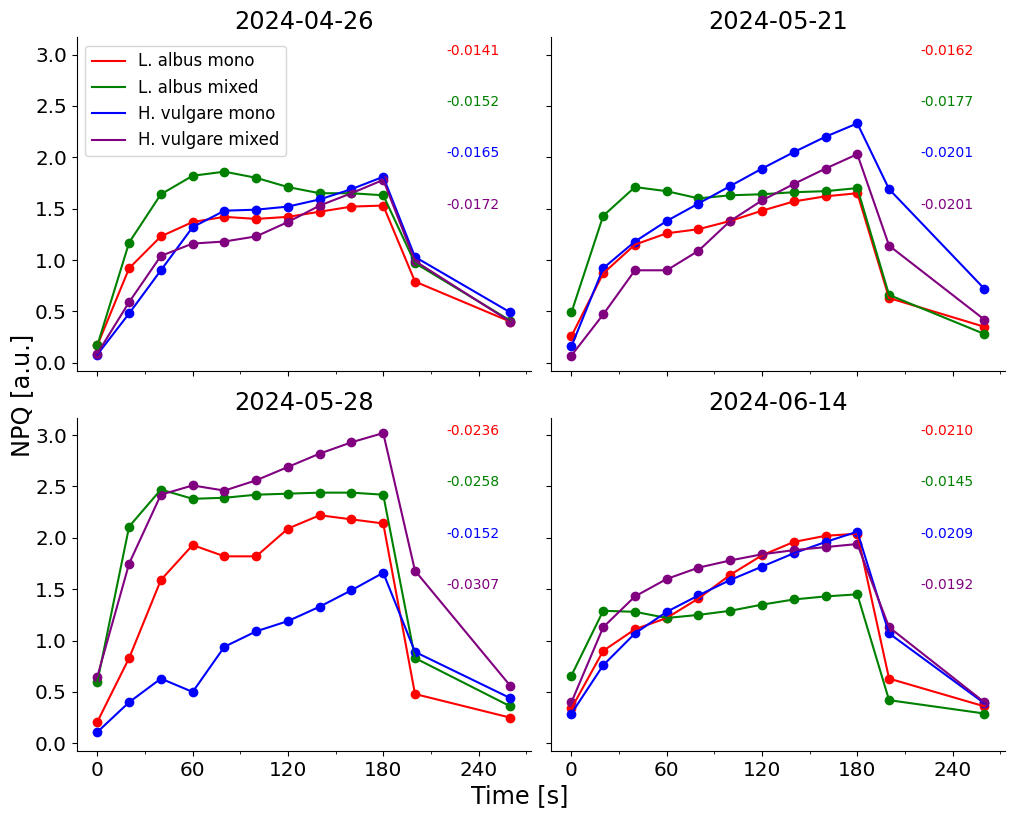

In [201]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df = df.drop([4, 5])  # Remember Python uses zero-based indexing
df = df.reset_index(drop=True)  # Reset the index after dropping rows

# Convert 'date and time' to 'date'
df['month'] = pd.to_datetime(df['month']).dt.date

# Get the unique dates
date_labels = df['month'].unique()

# Convert 'date' strings to datetime objects
date_objects = np.array([np.datetime64(date) for date in date_labels])

# Sort the datetime objects
sorted_indices = np.argsort(date_objects)
sorted_date_array = date_labels[sorted_indices]

# Create a figure and subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

# Define colors for each species
#df['species'] = pd.to_datetime(df['month']).dt.date

df['species'] = df['species'].replace({'Hv sm': 'H. vulgare mixed',
                                        'Hv ed': 'H. vulgare mono',
                                        'La sm': 'L. albus mixed',
                                        'La ed': 'L. albus mono'})

species_colors = {'L. albus mono': 'red', 'L. albus mixed': 'green', 'H. vulgare mono': 'blue', 'H. vulgare mixed': 'purple'}

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Get the NPQ columns (strings representing integers)
npq_columns = [col for col in df.columns if col.isdigit() and int(col) <= 300]

# Convert column names to integers for x-axis values
x_values = [int(col) for col in npq_columns]

print (x_values)
# Get the NPQ columns
#npq_columns = [col for col in df_date.columns if 'NPQ_' in col]

# Iterate over the dates and create a subplot for each
for i, date in enumerate(sorted_date_array):
    # Filter the dataframe for the current date
    df_date = df[df['month'] == date]

    # Set x-ticks to be divisible by 60
    xticks = np.arange(0, max(x_values) + 60, 60)
    axes[i].set_xticks(xticks)

    # Add minor ticks at 30s intervals
    minor_xticks = np.arange(0, max(x_values) + 30, 30)
    axes[i].set_xticks(minor_xticks, minor=True)

    # Remove the top and right spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    interv = 3
    # Group the data by species
    for species in species_colors.keys():
        df_species = df_date[df_date['species'] == species]
        if not df_species.empty:
            npq_data = df_species[npq_columns].values.flatten()
            #x_values = range(len(npq_data))
            #x_values = [value * 20 for value in x_values]
            axes[i].plot(x_values, npq_data, label=species, color=species_colors[species])
            axes[i].scatter(x_values, npq_data, color=species_colors[species])

            # Calculate and display the slope
            if 180 in x_values and 260 in x_values:
                index_180 = x_values.index(180)
                index_260 = x_values.index(260)
                slope = (npq_data[index_260] - npq_data[index_180]) / (260 - 180)
                axes[i].text(220, interv,
                             f"{slope:.4f}", color=species_colors[species], fontsize=10)
                interv -= 0.50


    axes[i].tick_params(axis='y', labelsize='x-large')  # Set font size to 12
    axes[i].tick_params(axis='x', labelsize='x-large')  # Set font size to 12
    # Set the title for the subplot
    axes[i].set_title(date, fontsize='xx-large')  # Set font size to 14

# Set common x and y labels
fig.text(0.5, -0.01, 'Time [s]', fontsize='xx-large', ha='center')
fig.text(-0.01, 0.5, 'NPQ [a.u.]', fontsize='xx-large', va='center', rotation='vertical')

# Add a legend to the last subplot
axes[0].legend(fontsize='large', loc='upper left')
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()